[Psycopg](https://www.psycopg.org/docs/) – адаптер базы данных PostgreSQL для Python 

Установить данный пакет на любой платформе можно одним способом — с помощью pip.

Запустите в отдельной ячейке Jupyter Notebook следующий код:

`!pip install psycopg2`

In [1]:
!pip install psycopg


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Теперь посмотрим, как можно подключиться к нашей базе и выполнять запросы из Jupyter-ноутбука.

**Для подключения нам потребуются следующие данные:**

- `dbname` — название базы, к которой нужно подключиться;
- `user` — имя пользователя в СУБД;
- `password` — пароль;
- `host` — адрес, по которому нужно подключиться;
- `port` — порт, к которому нужно подключиться (по умолчанию равен 5432).

Для нашей базы эти параметры такие:

```python
# хороший тон при фиксации изменений в github не публиковать код с открытыми данными для входа
# для запуска кода поместите данные, которые указаны на странице курса в эту ячейку
# при размещении в github удалите эту ячейку

DBNAME = 'skillfactory'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432
```

**НАСТРОЙКИ**

Начинаем с импорта библиотек:
```python
import psycopg2
import pandas as pd
```

Создаём соединение с заданными параметрами:
```python
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)
```

Запрос:
```py
# код запроса представляет из себя строковую переменную
n = 10
query = f'''select *
           from sql.pokemon
           limit {n}
        '''
# лучше использовать f-строки — так удобнее передавать параметры
```

**ВЫПОЛНЕНИЕ ЗАПРОСА**

```PY
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query, connection)
df
```

**ФИНАЛ**

```py
# Не забываем закрыть соединение после окончания работы
connection.close()
```

### <center> 2. Введение. Знакомство с данными

**Наш проект включает в себя несколько этапов:**

- знакомство с данными;
- предварительный анализ данных;
- детальный анализ вакансий;
- анализ работодателей;
- предметный анализ.

Все необходимые таблицы находятся в схеме `public` базы данных `project_sql` (именно эту базу вам необходимо указать в параметре `dbname` при подключении).

>**Схема** — это именованный набор объектов БД. В нашем случае объекты — это таблицы, но также к объектам схемы относятся представления, индексы, последовательности, типы данных, операторы и функции.

Схемы аналогичны папкам на уровне операционной системы, за исключением того, что схемы не могут быть вложенными.

**Преимущества использования схем:**

- организуют объекты базы данных в логические группы, чтобы сделать их более управляемыми;
- позволяют многим пользователям использовать одну базу данных, не мешая друг другу.

*Имя схемы указывается перед именем таблицы через точку.*

Ранее в курсе мы работали со схемой `sql`, поэтому перед именем таблицы всегда писали sql.

То есть **параметры подключения** будут следующими:
```py
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432
```

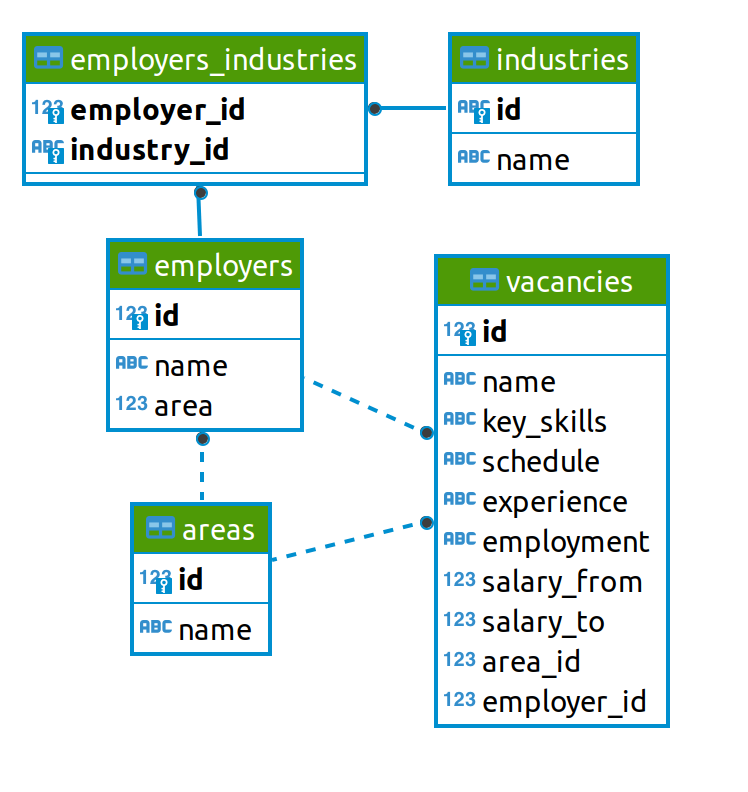